<a href="https://colab.research.google.com/github/preetamjumech/DL_DNN_from_Scratch/blob/main/Preetam_Saha_29_09_2022_Breast_Cancer__wisconsin_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

--2022-09-29 08:02:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast-cancer-wisconsin.data.1’

breast-cancer-wisco 100%[===================>]  19.42K  --.-KB/s    in 0.06s   

2022-09-29 08:02:48 (304 KB/s) - ‘breast-cancer-wisconsin.data.1’ saved [19889/19889]



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [3]:
df = pd.read_csv("/content/breast-cancer-wisconsin.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df[10].value_counts()

2    458
4    241
Name: 10, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [8]:
df[6].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: 6, dtype: int64

In [9]:
df = df[~(df.iloc[:,6]=="?")]
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       683 non-null    int64 
 1   1       683 non-null    int64 
 2   2       683 non-null    int64 
 3   3       683 non-null    int64 
 4   4       683 non-null    int64 
 5   5       683 non-null    int64 
 6   6       683 non-null    object
 7   7       683 non-null    int64 
 8   8       683 non-null    int64 
 9   9       683 non-null    int64 
 10  10      683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [11]:
df[6] = df.iloc[:,6].apply(lambda x : int(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       683 non-null    int64
 1   1       683 non-null    int64
 2   2       683 non-null    int64
 3   3       683 non-null    int64
 4   4       683 non-null    int64
 5   5       683 non-null    int64
 6   6       683 non-null    int64
 7   7       683 non-null    int64
 8   8       683 non-null    int64
 9   9       683 non-null    int64
 10  10      683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [13]:
import torch,torchsummary
import torch.nn as nn
import torch.nn.functional as F 
from torch.utils.data import DataLoader,TensorDataset 
from torch.optim import Adam,RMSprop

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
x.shape

(683, 10)

In [16]:
y.shape

(683,)

In [17]:
y = y.map({2:0,4:1})

In [18]:
x = torch.tensor(x.values)
y=torch.Tensor(y.values)

In [19]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [20]:
train_loader = DataLoader(TensorDataset(x_train.float(),y_train),
                                       batch_size=64,shuffle = True)

test_loader = DataLoader(TensorDataset(x_test.float(),y_test),
                                      batch_size = 64,shuffle = False)

In [21]:
class DNN_MNIST(nn.Module):
  def __init__(self):
    super(DNN_MNIST,self).__init__()

    self.h1 = nn.Linear(in_features=10, out_features = 512)
    self.h2 = nn.Linear(in_features=512, out_features = 256)
    self.h3 = nn.Linear(in_features=256, out_features = 128)
    self.h4 = nn.Linear(in_features=128, out_features = 64)
    self.out = nn.Linear(in_features=64, out_features = 2)
    self.bn1 = nn.BatchNorm1d(num_features=512)
    self.bn2 = nn.BatchNorm1d(num_features=256)
    self.bn3 = nn.BatchNorm1d(num_features=128)
    self.dropout = nn.Dropout(p=0.4)

  def forward(self,x):
    x = F.relu(self.h1(x))
    x = self.bn1(x)
    x = self.dropout(x)

    x = F.relu(self.h2(x))
    x = self.bn2(x)
    x = self.dropout(x)

    x = F.relu(self.h3(x))
    x = self.bn3(x)
    x = self.dropout(x)

    x = F.relu(self.h4(x))
    x = self.dropout(x)

    x = self.out(x)
    return x

In [22]:
dnn_model = DNN_MNIST()

In [23]:
list(dnn_model.parameters())

[Parameter containing:
 tensor([[ 0.1961, -0.1088, -0.2321,  ..., -0.0749, -0.1049, -0.2277],
         [-0.1419,  0.0938,  0.2887,  ..., -0.2946,  0.0178,  0.3029],
         [ 0.2281, -0.1557, -0.1607,  ...,  0.0206, -0.0380, -0.0421],
         ...,
         [-0.1244,  0.0121,  0.1895,  ...,  0.1745, -0.3103,  0.1255],
         [-0.2987, -0.3007, -0.0852,  ...,  0.1251, -0.1182,  0.2198],
         [-0.0418,  0.0537, -0.0647,  ...,  0.1419, -0.2415, -0.2346]],
        requires_grad=True), Parameter containing:
 tensor([-0.2496, -0.1318, -0.0465,  0.1801, -0.0375, -0.1719, -0.1579,  0.0719,
          0.0527,  0.0638, -0.0786, -0.1526,  0.0390,  0.1331, -0.1269, -0.2943,
          0.0774, -0.0960,  0.1739, -0.1396, -0.1046, -0.1190,  0.3147,  0.1867,
          0.0342,  0.2500,  0.1009, -0.2176, -0.0839,  0.1033, -0.3011,  0.1474,
          0.2959,  0.1193,  0.0294, -0.0815,  0.1624, -0.1688,  0.1073, -0.0405,
         -0.2036,  0.0127, -0.0597, -0.2478, -0.1998, -0.3055, -0.0050,  0.2888,

In [24]:
opt = Adam(dnn_model.parameters(),lr=0.001)

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [26]:
dnn_model = dnn_model.to(device)

In [27]:
from tqdm import tqdm

In [28]:
def training(model, train_loader, opt):
    train_loss = 0.0
    model.train()
    for batch, target in tqdm(train_loader):
        batch = batch.float().to(device)
        target = target.to(device)
        #print(target.dtype)

        opt.zero_grad()
        output = model(batch.float())
        #print(output.dtype)

        loss = F.cross_entropy(output, target.long())
        loss.backward()
        opt.step()
        train_loss += loss.item()

    return train_loss

In [29]:
def validate(model, test_loader, opt):
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for batch, target in tqdm(test_loader):
            batch = batch.float().to(device)
            target = target.to(device)

            output = model(batch.float())
            loss = F.cross_entropy(output, target.long())
            val_loss += loss.item()
    return val_loss

In [30]:
model = dnn_model.to(device)
hist = {'train_loss':[], 'val_loss':[]}
for epoch in range(2):
    hist['train_loss'].append(training(model, train_loader,opt))
    hist['val_loss'].append(validate(model, test_loader,opt))

100%|██████████| 4/4 [00:00<00:00, 320.61it/s]


In [32]:
hist

{'train_loss': [5.543815016746521, 5.468147456645966],
 'val_loss': [2.535599172115326, 2.6143091320991516]}

In [34]:
preds_test = dnn_model(x_test.float().to(device)).detach().cpu().numpy()

In [36]:
preds = np.argmax(preds_test,axis = 1)

In [39]:
import pandas as pd

In [38]:
pd.crosstab(preds, y_test.numpy())

col_0,0.0,1.0
row_0,,
0,138,66
1,1,0


In [43]:
from  sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [41]:
confusion_matrix(preds,y_test)

array([[138,  66],
       [  1,   0]])

In [42]:
accuracy_score(preds,y_test)

0.6731707317073171

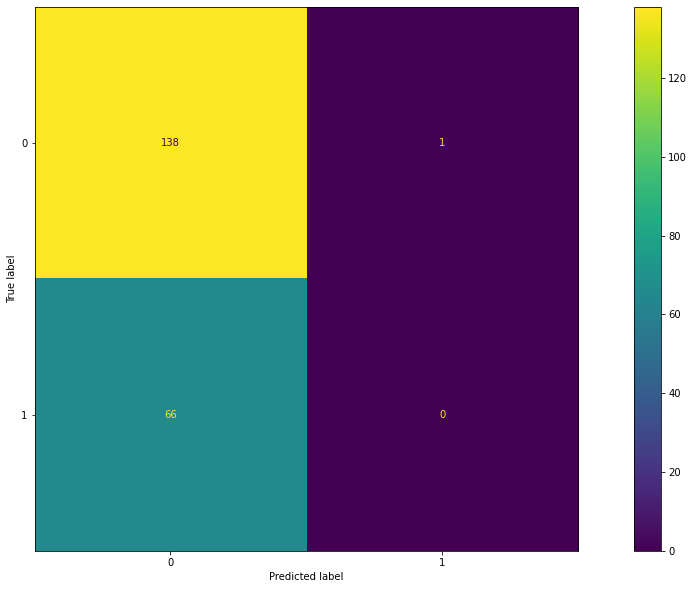

In [44]:
cm=confusion_matrix(y_test,preds)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()